In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

import os 

In [ ]:
!mkdir -p /content/camera_sticker/models
!mkdir -p /content/camera_sticker/images

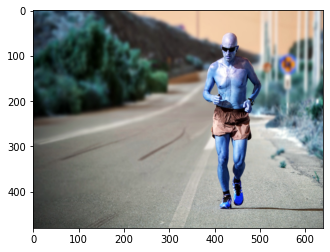

In [ ]:
import os
my_image_path = '/content/camera_sticker/images/human1.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

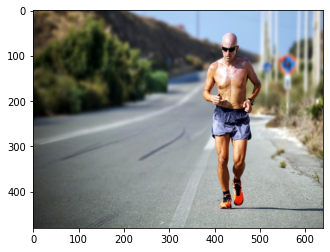

In [ ]:
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [ ]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
# HISTOGRAM OF ORIENTED GRADIENT FEATURE를 사용해서 svm의 sliding window로 얼굴을 찾음 
#dlib은 rgb이미지로 입력을 받음 

rectangles[[(413, 78) (449, 114)]]


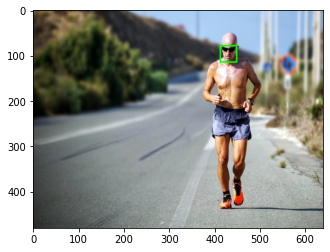

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
! mv shape_predictor_68_face_landmarks.dat.bz2 /content/camera_sticker/models
! cd /content/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

--2020-09-09 16:55:32--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  1.89MB/s    in 4m 57s  

2020-09-09 17:00:29 (211 KB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
import os
model_path = '/content/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [ ]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print(len(list_landmarks[0]))

68


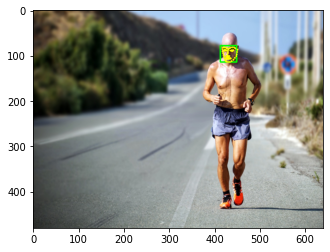

In [ ]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(429, 99)
(x,y) : (429,81)
(w,h) : (37,37)


In [ ]:
import os
sticker_path = '/content/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(37, 37, 3)


In [ ]:
refined_x = x - w // 2  # left
refined_y = (t + ( t + b ) // 2 ) // 2   # top
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (411,87)


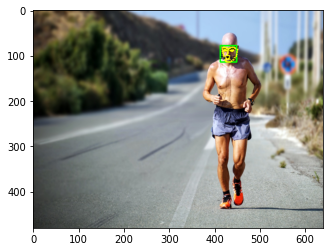

In [ ]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

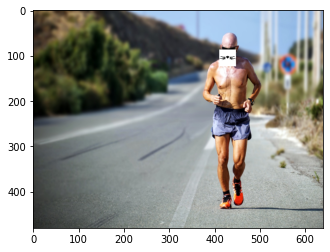

In [ ]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint32)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def sticker_image(image_path, sticker_path):
    my_image_path = image_path
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x360의 크기로 Resize
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

    detector_hog = dlib.get_frontal_face_detector()

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    ! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    ! mv shape_predictor_68_face_landmarks.dat.bz2 /content/camera_sticker/models
    ! cd /content/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

    model_path = '/content/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)

    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[30][0]
        y = landmark[30][1] - dlib_rect.width()//2
        w = dlib_rect.width()
        h = dlib_rect.width()

    sticker_path = sticker_path
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))

    refined_x = x - w // 2  # left
    refined_y = (t + ( b - t ) // 2 ) // 2 

    sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint32)

    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()

--2020-09-09 18:15:24--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  1.92MB/s    in 3m 47s  

2020-09-09 18:19:11 (276 KB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



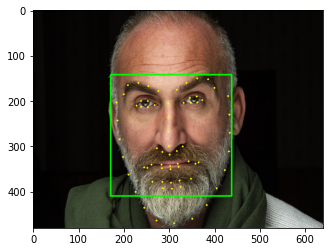

In [ ]:
# human picture image
image_path = '/content/camera_sticker/images/human.jpg'
sticker_path = '/content/camera_sticker/images/cat-whiskers.png' 
sticker_image(image_path,sticker_path)

--2020-09-09 17:27:48--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_  27%[====>               ]  16.91M  12.1KB/s    in 2m 24s  

2020-09-09 17:30:12 (120 KB/s) - Connection closed at byte 17727552. Retrying.

--2020-09-09 17:30:13--  (try: 2)  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 64040097 (61M), 46312545 (44M) remaining
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_  57%[+++++=====>         ]  34.94M   148KB/s    in 2m 2s   

2020-09-09 17:32:15 (151 KB/s) - Connection closed at byte 36633714. Retrying.

--2020-09-09 17:32:1

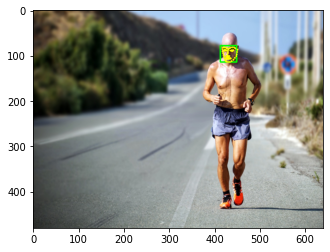

In [ ]:
#long distance image
image_path = '/content/camera_sticker/images/human1.jpg'
sticker_path = '/content/camera_sticker/images/cat-whiskers.png' 
sticker_image(image_path,sticker_path)

카메라 스티커앱 문제점
얼굴각도, 이미지 밝게, 촬영거리 
다양한 변수